In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import spatial
from collections import Counter
import os
import pickle
from sklearn.decomposition import PCA
from math import log

In [3]:
finCountSource = "./data/Finnish/temp_txt"
sweCountSource = "./data/Swedish/"
decades = [str(i) for i in range(1750, 1910, 10)]

In [102]:
class LanguageCounter():
    def __init__(self, dataPath):
        self.dataPath = dataPath
        self.allCounters = {}
        self.commonWords = {}
        
        self.topWordsTotal = None
        self.allFeatized = None
        
        #buildCommonCounters(self.datapath)
        #buildFeatures()
    
    """
        For every pickle file in dataPath, adds a counter for each decade to self.allCounters
    """
    def buildCommonCounters(self, dataPath):
        # commonWords = []
        # allCounters = {d: Counter() for d in decades}
        # TODO: re-run for finnish 1771 bc im dumb
        for f in os.listdir(dataPath):
            if(f.endswith(".pickle")):
                decade = os.path.basename(f)
                decade = decade[decade.index("1"): decade.index("1")+3] + "0"
                if decade not in list(self.allCounters.keys()):
                    print("adding decade", decade)
                    self.allCounters[decade] = Counter()
                    self.commonWords[decade] = set([])

                with open(os.path.join(dataPath, f), 'rb') as f:
                    wordCounter = pickle.load(f)

                self.allCounters[decade] += wordCounter
                top100 = [w[0] for w in wordCounter.most_common(100)]
                # Build a list of the top 100 across all files of a decade
                # Mainly helps get an idea over anything quantitative
                self.commonWords[decade].update(top100)
    
    def getOverlaps(self):
        overlaps = []
        simToBase = [100]
        for i in range(len(self.commonWords)-1):
            overlaps += [len(set(self.commonWords[i]).intersection(self.commonWords[i+1]))]
            simToBase += [len(set(self.commonWords[i+1]).intersection(self.commonWords[0]))]
        # overlapBounds = len(set(self.commonWords[0]).intersection(self.commonWords[-1]))
        return overlaps, simToBase
    
    def buildFeatures(self):
        totalFreqs = sum(self.allCounters.values(), Counter())
        totalFreqsSorted = totalFreqs.most_common()
        self.topWordsCounter = totalFreqs.most_common(250)
        
        self.topWordsTotal = []
        i = 0
        while len(self.topWordsTotal) < 250: 
            word = totalFreqsSorted[i]
            inText = [1 if word[0] in list(self.allCounters.values())[j] else 0 for j in range(len(self.allCounters))]
            proport = sum(inText) / len(inText)
            print("word ", word, "in % of texts: ", proport)
            if proport >= 0.5: 
                self.topWordsTotal += [word[0]]
            i += 1
            
        self.allFeatize = []
        for counter in list(self.allCounters.values()):
            lenDoc = sum(counter.values())
            featize = np.array([counter[self.topWordsTotal[i]] for i in range(len(self.topWordsTotal))])
            featize = np.divide(featize, lenDoc)
            self.allFeatize += [featize]
        


In [103]:
fin = LanguageCounter(finCountSource)
fin.buildCommonCounters(fin.dataPath)

adding decade 1770
adding decade 1780
adding decade 1790
adding decade 1800
adding decade 1810
adding decade 1820
adding decade 1830
adding decade 1840
adding decade 1850
adding decade 1860
adding decade 1870


In [104]:
swe = LanguageCounter(sweCountSource)
swe.buildCommonCounters(swe.dataPath)

adding decade 1780
adding decade 1820
adding decade 1840
adding decade 1860
adding decade 1880
adding decade 1800
adding decade 1760
adding decade 1750
adding decade 1770
adding decade 1790
adding decade 1810
adding decade 1830
adding decade 1850
adding decade 1870
adding decade 1890


In [38]:
# Similarity wrt 1770 decade over time
_, finSimToBase = fin.getOverlaps()
plt.plot(finSimToBase)
plt.show()

_, sweSimToBase = swe.getOverlaps()
plt.plot(sweSimToBase)
plt.show()

KeyError: 0

In [105]:
fin.buildFeatures()

word  ('och', 13093167) in % of texts:  1.0
word  ('att', 7109041) in % of texts:  1.0
word  ('den', 5927745) in % of texts:  1.0
word  ('till', 5756171) in % of texts:  1.0
word  ('för', 4744115) in % of texts:  1.0
word  ('som', 3915510) in % of texts:  1.0
word  ('med', 3811842) in % of texts:  1.0
word  ('det', 3183713) in % of texts:  1.0
word  ('sig', 2310128) in % of texts:  1.0
word  ('ett', 2109138) in % of texts:  1.0
word  ('icke', 1802716) in % of texts:  1.0
word  ('har', 1649863) in % of texts:  1.0
word  ('han', 1503086) in % of texts:  1.0
word  ('eller', 1233506) in % of texts:  1.0
word  ('samt', 1219247) in % of texts:  1.0
word  ('man', 1206344) in % of texts:  1.0
word  ('jag', 1062656) in % of texts:  1.0
word  ('under', 1055095) in % of texts:  1.0
word  ('vid', 1039063) in % of texts:  1.0
word  ('sin', 1004965) in % of texts:  1.0
word  ('hos', 995370) in % of texts:  1.0
word  ('från', 959604) in % of texts:  1.0
word  ('denna', 956351) in % of texts:  1.0
wor

In [106]:
swe.buildFeatures()

word  ('och', 8797507) in % of texts:  1.0
word  ('att', 4338934) in % of texts:  1.0
word  ('till', 4184704) in % of texts:  1.0
word  ('den', 3773970) in % of texts:  1.0
word  ('för', 3011790) in % of texts:  1.0
word  ('med', 2494393) in % of texts:  1.0
word  ('som', 2305741) in % of texts:  1.0
word  ('det', 2141029) in % of texts:  1.0
word  ('ett', 1543461) in % of texts:  1.0
word  ('sig', 1369393) in % of texts:  1.0
word  ('han', 1081186) in % of texts:  1.0
word  ('har', 1077902) in % of texts:  1.0
word  ('samt', 945320) in % of texts:  1.0
word  ('icke', 904895) in % of texts:  1.0
word  ('från', 882296) in % of texts:  1.0
word  ('under', 837031) in % of texts:  1.0
word  ('wid', 832402) in % of texts:  1.0
word  ('eller', 821835) in % of texts:  1.0
word  ('hos', 811937) in % of texts:  1.0
word  ('jag', 800365) in % of texts:  1.0
word  ('man', 758882) in % of texts:  1.0
word  ('men', 671261) in % of texts:  1.0
word  ('vid', 666384) in % of texts:  1.0
word  ('frän',

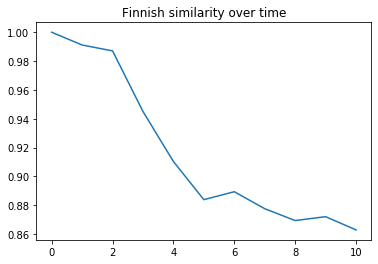

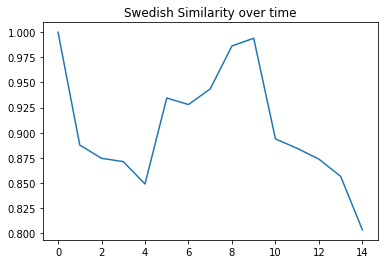

In [11]:
similarity = [1-spatial.distance.cosine(fin.allFeatize[0], fin.allFeatize[i]) for i in range(len(fin.allFeatize))]
plt.plot(similarity)
plt.title("Finnish similarity over time")
plt.show()

similarity = [1-spatial.distance.cosine(swe.allFeatize[0], swe.allFeatize[i]) for i in range(len(swe.allFeatize))]
plt.plot(similarity)
plt.title("Swedish Similarity over time")
plt.show()

In [14]:
pca = PCA(n_components=4)
pca_result= pca.fit_transform(fin.allFeatize)

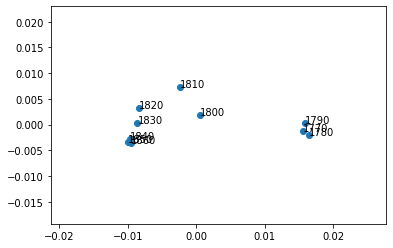

In [39]:
x = pca_result[:, 0]
y = pca_result[:,1]
plt.scatter(x, y)
for i in range(len(decades)):
    plt.annotate(decades[i], (x[i], y[i]))
plt.show()

# Qualitative Comparison
* "wid" in Finnish vs. "vid" in Swedish- are they same word/different spelling? 
* från(F) vs. frän (S)
* Helsingfors (F), stockholm (S) & norrkoping
* Words I'm not sure about: amp, Det, sina, ore, 
* Generally similar words, but different orderings

Finnish loanwords found [here](https://www.quora.com/Could-someone-point-to-Finnish-influences-in-the-Swedish-language). Every Finnish loanword is more common in the Finnish text than Swedish texts. Some example words: 
* Kola: "to die", the closest in frequency across both dialects. Likely the most common lonaword. 
* Mukja: the endagered fish vendace. Usually used only in the remote northern parts of Sweden. 
* Memma: adopted from the Finnish word mammi, a Finnish easter pudding. The loanword was created when the pudding was exported to Sweden. 

In [43]:
print(fin.topWordsTotal[:50], "\n", swe.topWordsTotal[:50])

['och', 'att', 'den', 'till', 'för', 'som', 'med', 'det', 'sig', 'ett', 'icke', 'har', 'han', 'eller', 'samt', 'man', 'jag', 'under', 'vid', 'sin', 'hos', 'från', 'denna', 'wid', 'men', 'genom', 'alla', 'frän', 'hade', 'detta', 'efter', 'uti', 'skulle', 'der', 'utan', 'Den', 'Helsingfors', 'andra', 'kan', 'dem', 'mig', 'honom', 'hans', 'sina', 'Det', 'äro', 'var', 'hon', 'amp', 'skall'] 
 ['och', 'att', 'till', 'den', 'för', 'med', 'som', 'det', 'ett', 'sig', 'han', 'har', 'samt', 'icke', 'från', 'under', 'wid', 'eller', 'hos', 'jag', 'man', 'men', 'vid', 'frän', 'denna', 'sin', 'alla', 'efter', 'hade', 'genom', 'detta', 'kan', 'öre', 'sorn', 'uti', 'var', 'der', 'hon', 'norrköping', 'andra', 'honom', 'mot', 'hans', 'äro', 'utan', 'oell', 'stockholm', 'kunna', 'mig', 'skulle']


In [45]:
print("in F but not S: ", set(fin.topWordsTotal[:50]).difference(swe.topWordsTotal[:50]))
print("in S but not F: ", set(swe.topWordsTotal[:50]).difference(fin.topWordsTotal[:50]) )

in F but not S:  {'skall', 'amp', 'Det', 'Helsingfors', 'dem', 'sina', 'Den'}
in S but not F:  {'stockholm', 'norrköping', 'kunna', 'mot', 'öre', 'sorn', 'oell'}


In [13]:
candidates = ["kola", "kova", "pärta", "pulka", "tojs", "mujka", "memma", "rapakivi", "koling"]
for cand in candidates: 
    #finFreq = sum([log(c[cand]+1)-log(sum(c.values())) for c in fin.allCounters.values()])
    #sweFreq = sum([log(c[cand]+1)-log(sum(c.values())) for c in swe.allCounters.values()])
    finCount = sum([c[cand] for c in fin.allCounters.values()])
    sweCount = sum([c[cand] for c in swe.allCounters.values()])
    finTotal = sum([sum(c.values()) for c in fin.allCounters.values()])
    sweTotal = sum([sum(c.values()) for c in fin.allCounters.values()])
    finFreq = (log(finCount+1)-log(finTotal))
    sweFreq = (log(sweCount+1)-log(sweTotal))
    #print([c[cand] for c in swe.allCounters.values()])
    print("Finnish loanword freq {:s}: \tFinnish: {:4f} \tSwedish: {:4f} \t [{:s}]".format(
        cand, finFreq, sweFreq, str(finFreq > sweFreq)
    ))

Finnish loanword freq kola: 	Finnish: -11.524768 	Swedish: -13.041700 	 [True]
Finnish loanword freq kova: 	Finnish: -15.577079 	Swedish: -16.822295 	 [True]
Finnish loanword freq pärta: 	Finnish: -17.281827 	Swedish: -18.668122 	 [True]
Finnish loanword freq pulka: 	Finnish: -15.360015 	Swedish: -16.631240 	 [True]
Finnish loanword freq tojs: 	Finnish: -18.668122 	Swedish: -18.380440 	 [False]
Finnish loanword freq mujka: 	Finnish: -17.464149 	Swedish: -19.766734 	 [True]
Finnish loanword freq memma: 	Finnish: -13.395122 	Swedish: -19.766734 	 [True]
Finnish loanword freq rapakivi: 	Finnish: -16.508638 	Swedish: -19.766734 	 [True]
Finnish loanword freq koling: 	Finnish: -16.876362 	Swedish: -18.380440 	 [True]


In [67]:
totalFin = [sum(c) for c in fin.allCounters.values()]
totalSwe = sum(swe.allCounters.values(), Counter())

In [19]:
overlaps = []
simToBase = []
for i in range(len(fin.commonWords)-1):
    overlaps += [(set(fin.commonWords[i]).intersection(fin.commonWords[i+1]))]

In [46]:
for i in range(len(fin.commonWords)-1):
    decade = list(fin.commonWords.keys())[i]
    overlaps += [fin.commonWords[decade].intersection(decade)]

In [67]:
finEntireOverlap = set.intersection(*[set(v) for k, v in fin.commonWords.items()])
sweEntireOverlap = set.intersection(*[set(v) for k, v in swe.commonWords.items()])

print("Finnish overlap words {:d}: \n{:s}".format(len(finEntireOverlap), str(finEntireOverlap)))
print("Swedish overlap words {:d}: \n{:s}".format(len(sweEntireOverlap), str(sweEntireOverlap)))

Finnish overlap words 63: 
{'han', 'hos', 'sin', 'frän', 'emot', 'med', 'sig', 'kunde', 'hon', 'genom', 'mera', 'hans', 'Den', 'endast', 'tid', 'denna', 'detta', 'äro', 'kan', 'som', 'efter', 'wid', 'första', 'alt', 'del', 'uti', 'alla', 'deras', 'och', 'all', 'den', 'Det', 'här', 'till', 'sedan', 'men', 'sina', 'min', 'icke', 'har', 'kunna', 'hade', 'der', 'andra', 'under', 'för', 'dag', 'samma', 'eller', 'man', 'honom', 'dem', 'Men', 'hela', 'ock', 'ännu', 'mig', 'utan', 'jag', 'att', 'samt', 'det', 'amp'}
Swedish overlap words 36: 
{'han', 'hos', 'sin', 'sig', 'med', 'hans', 'denna', 'detta', 'äro', 'kan', 'som', 'efter', 'stockholm', 'alla', 'och', 'den', 'här', 'till', 'sedan', 'icke', 'har', 'hade', 'andra', 'under', 'för', 'samma', 'eller', 'man', 'honom', 'mig', 'ett', 'utan', 'jag', 'samt', 'det', 'men'}


In [ ]:
# Find top 250 most freqeuent across both
# Build frequencies for each counter- normalize? 

In [112]:
totalSwed = sum([s[1] for s in swe.topWordsCounter])
freqsSwed = []
for c in swe.topWordsCounter:
    freqsSwed += [(c[0], c[1]/totalSwed)]
    
totalFin = sum([s[1] for s in fin.topWordsCounter])
freqsFin = []
for c in fin.topWordsCounter:
    freqsFin += [(c[0], c[1]/totalFin)]

In [118]:
combined = Counter()
for word in freqsSwed: 
    combined[word[0]] += word[1]
for word in freqsFin: 
    combined[word[0]] += word[1]

In [126]:
sweAllFeatize = []
for counter in list(swe.allCounters.values()):
    lenDoc = sum(counter.values())
    #featize = np.array([counter[combined[i][0]] for i in range(len(combined))])
    featize = np.array([counter[k] for k,v in combined.items()])
    featize = np.divide(featize, lenDoc)
    sweAllFeatize += [featize]
    
finAllFeatize = []
for counter in list(fin.allCounters.values()):
    lenDoc = sum(counter.values())
    #featize = np.array([counter[combined[i][0]] for i in range(len(combined))])
    featize = np.array([counter[k] for k,v in combined.items()])
    featize = np.divide(featize, lenDoc)
    finAllFeatize += [featize]

In [132]:
print(len(sweAllFeatize), len(finAllFeatize))

17 11


In [127]:
pca = PCA(n_components=4)
pca_result= pca.fit_transform(sweAllFeatize + finAllFeatize)

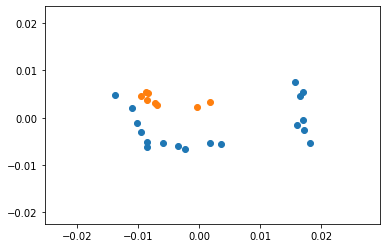

In [136]:
x_swe = pca_result[:18, 0]
x_fin = pca_result[18:,0]
y_swe = pca_result[:18,1]
y_fin = pca_result[18:,1]
plt.scatter(x_swe, y_swe)
plt.scatter(x_fin, y_fin)
"""for i in range(len(decades)):
    plt.annotate(decades[i], (x[i], y[i]))"""
plt.show()